In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling.profile_report import ProfileReport

%config InlineBackend.figure_format = 'retina'

In [5]:
data = pd.read_csv('cumulative.csv', index_col='rowid')

In [23]:
# non-useful and data leakage columns
non_inputs = [
    'kepid', 'kepoi_name', 'kepler_name', 
    'koi_score', 'koi_tce_delivname', 'koi_fpflag_nt', 
    'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_disposition', 'koi_pdisposition', 'dec', 'ra'
]
non_inputs.extend([col for col in data.columns if '_err' in col])

In [24]:
data.drop(columns=non_inputs)

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,koi_kepmag
rowid,,,,,,,,,,,,,,
1,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,15.347
2,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,15.347
3,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,15.436
4,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,15.597
5,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,1.0,5638.0,4.296,1.088,14.478
9561,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,1.0,5638.0,4.529,0.903,14.082
9562,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608.0,1585.81,10.6,1.0,6119.0,4.444,1.031,14.757


In [12]:
data.koi_kepmag.min(), data.koi_kepmag.max()

(6.966, 20.003)

<AxesSubplot:xlabel='koi_kepmag', ylabel='Count'>

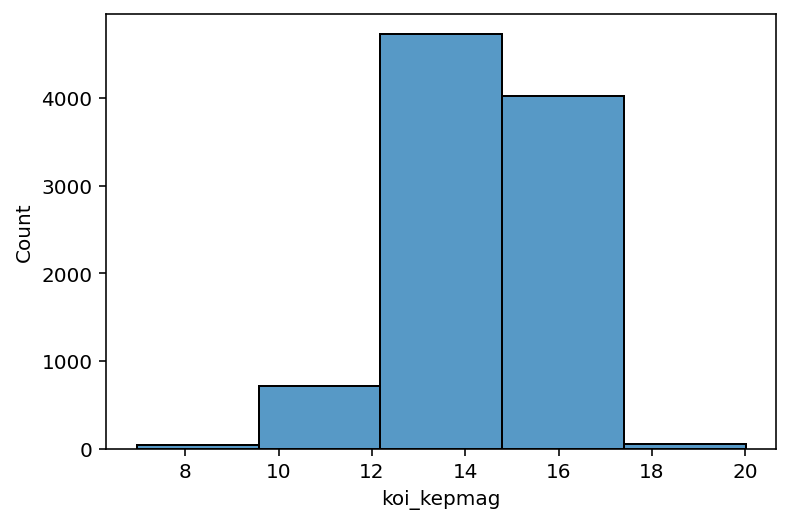

In [106]:
sns.histplot(data=data, x='koi_kepmag', bins=5)

could probably bin kepmag

In [13]:
data.koi_slogg.min(), data.koi_slogg.max()

(0.047, 5.364)

<AxesSubplot:xlabel='koi_slogg', ylabel='Count'>

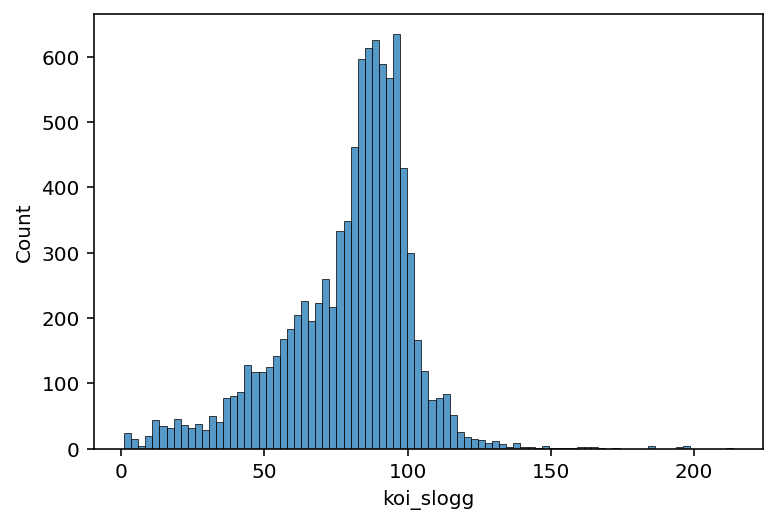

In [34]:
sns.histplot(data=data[['koi_slogg']].apply(np.exp), x='koi_slogg')

In [25]:
data.koi_srad.min(), data.koi_srad.max()

(0.109, 229.908)

<AxesSubplot:xlabel='koi_srad', ylabel='Count'>

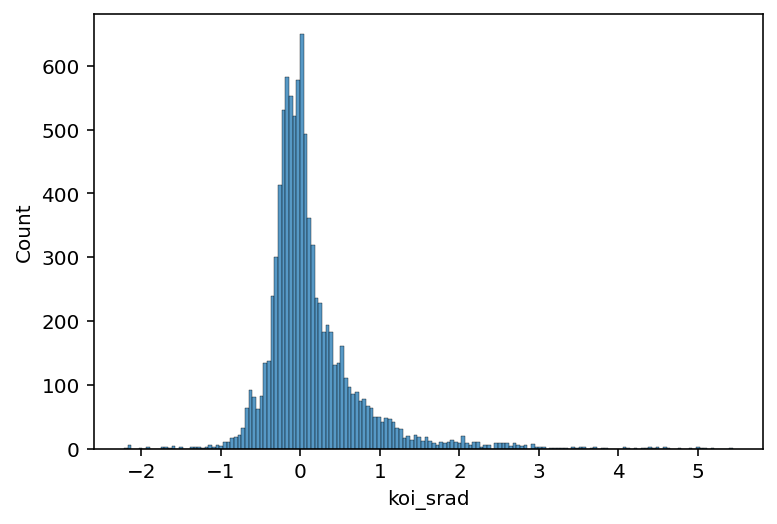

In [32]:
sns.histplot(data=data[['koi_srad']].apply(np.log), x='koi_srad')

<AxesSubplot:xlabel='koi_tce_plnt_num', ylabel='Count'>

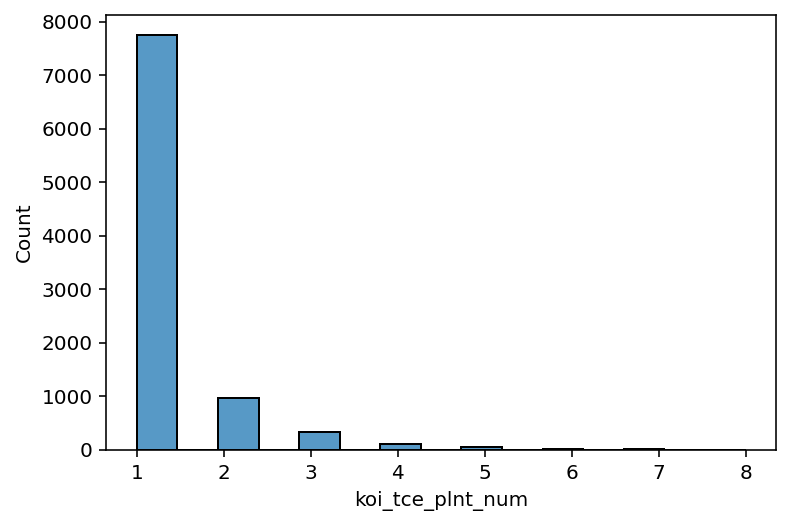

In [29]:
sns.histplot(data.koi_tce_plnt_num)

In [40]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/59 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

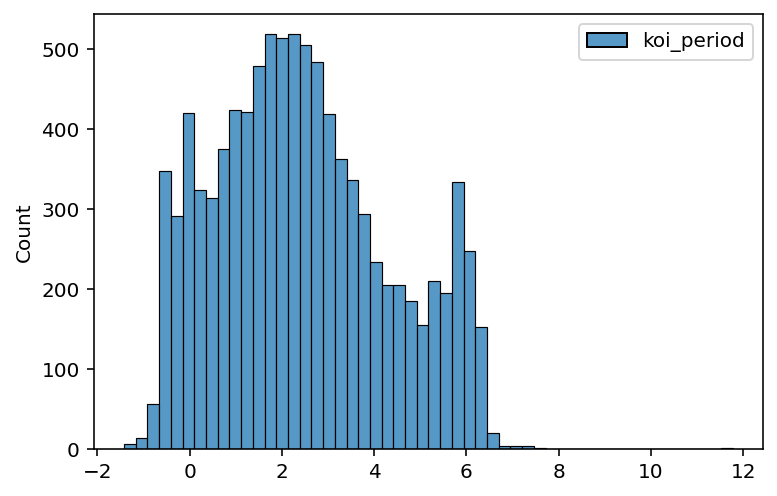

In [41]:
sns.histplot(data=data[['koi_period']].apply(np.log))

<AxesSubplot:ylabel='Count'>

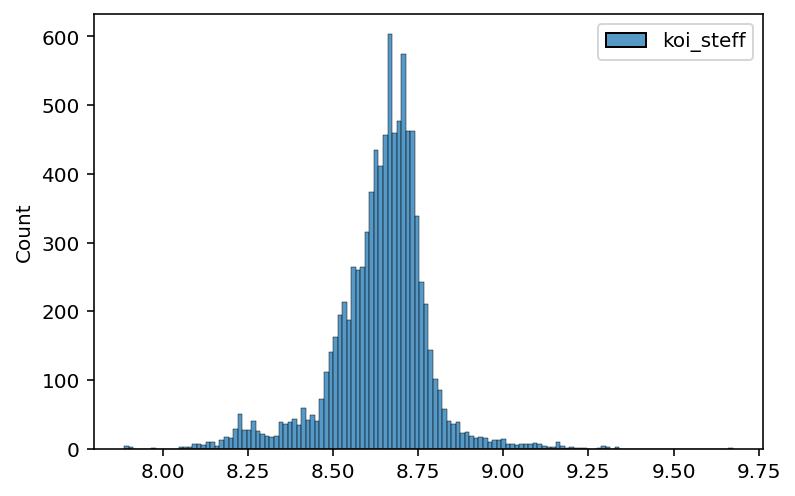

In [46]:
sns.histplot(data=data[['koi_steff']].apply(np.log))

In [125]:
num_cols = [
    'koi_srad', 'koi_period', 'koi_time0bk',
    'koi_impact', 'koi_duration', 'koi_depth',
    'koi_prad', 'koi_teq', 'koi_insol',
    'koi_model_snr', 'koi_steff', 'koi_slogg'
]

num_cols2 = list(map(lambda x: int(np.where(data.columns == x)[0][0]), num_cols))

In [126]:
data.iloc[:, num_cols2]

,koi_srad,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg
rowid,,,,,,,,,,,,
1,0.927,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467
2,0.927,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467
3,0.868,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544
4,0.791,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564
5,1.046,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438
...,...,...,...,...,...,...,...,...,...,...,...,...
9560,1.088,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296
9561,0.903,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529
9562,1.031,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608.0,1585.81,10.6,6119.0,4.444
